<a href="https://colab.research.google.com/github/kanishka-006/grip_tasks/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hello Everyone!!**

My name is ***Kanishka***

Currently pursuing my btech from IIT,Roorkee


In [1]:
import numpy as np
import pandas as pd

In [2]:
URL="http://bit.ly/w-data"
data=pd.read_csv(URL)

In [3]:
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Analyze the relation between x and y')

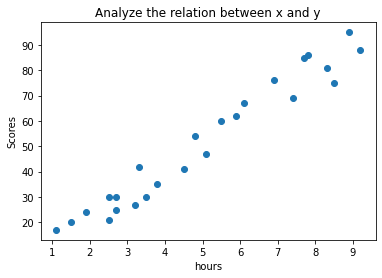

In [5]:
#scatter plot using matplotlib.pyplot 
plt.scatter(data.Hours,data.Scores)
plt.xlabel("hours")
plt.ylabel("Scores")
plt.title("Analyze the relation between x and y")

In [6]:
print(np.mean(data.Hours))
print(np.mean(data.Scores))

5.012
51.48


In [7]:
np.random.seed(10)
sh_indices = np.random.permutation(len(data.Hours))
X=data.Hours[sh_indices]
Y=data.Scores[sh_indices]

In [8]:
def data_split(x,y,tpct=0.1):
  t_value= int(tpct*x.size)
  x_test,y_test=np.array(x[:t_value]),np.array(y[:t_value])
  x_train,y_train=np.array(x[t_value:]),np.array(y[t_value:])
  return x_train,y_train,x_test,y_test

In [9]:
x_train,y_train,x_test,y_test = data_split(X,Y)

In [10]:
x_train = x_train.reshape((x_train.shape[0], 1))
x_test = x_test.reshape((x_test.shape[0], 1))

In [11]:
print(x_train.shape)
print(x_test.shape)

(23, 1)
(2, 1)


In [12]:
print(x_test,y_test)


[[1.5]
 [5.1]] [20 47]


In [13]:
x_train.shape

(23, 1)

In [14]:
from sklearn.linear_model import LinearRegression
linear_regress=LinearRegression()
linear_regress.fit(x_train,y_train)
print("training sucessful")

training sucessful


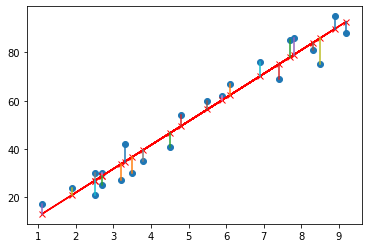

In [15]:
y_pred=linear_regress.predict(x_train)
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred,'r')
plt.plot(x_train,y_pred,'rx') #add the prediction points 
for i in range(len(x_train)):
        lineXdata = (x_train[i], x_train[i]) # same X
        lineYdata = (y_train[i], y_pred[i]) # different Y
        plt.plot(lineXdata, lineYdata)
plt.show()

In [16]:
y_predt=linear_regress.predict(x_test)
y_predt.shape


(2,)

   test_x  test_y  Predicted_y
0     1.5      20    16.991290
1     5.1      47    52.444036


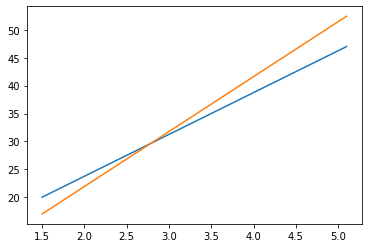

In [17]:
plt.plot(x_test,y_test)
plt.plot(x_test,y_predt)
df = pd.DataFrame({'test_x':x_test.reshape(2),'test_y': y_test.reshape(2), 'Predicted_y': y_predt.reshape(2)}) 
print(df)
plt.show()

In [18]:
def pred(value):
  v_predict=linear_regress.predict(value)
  print("The prediction for",value,"is",v_predict)
  return v_predict

In [19]:
hr=np.array(9.25)
hr=hr.reshape(-1,1)
v_predict=pred(hr)
print(v_predict)

The prediction for [[9.25]] is [93.31317269]
[93.31317269]


In [20]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_predt)) 

Mean Absolute Error: 4.226372665181984
